# Molecular mechanics 2

Last week we focused on building molecules and optimising their structure. In this lab we will be simulating their dynamics using molecular dynamics. 

In the first section we will understand how forcefields allow for dynamics to be calculated and at the end we will show how the dynamics of water can be simulated.

In [1]:
#Importing the important libraries
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import clear_output
import ipywidgets as widgets

## Potential energy surface for a bond vibration

Molecular vibrations can be modelled as a ball and spring. We will consider a symmetric harmonic model and an anharmonic morse potential meodel.

To begin with we can compare the potential energy for a harmonic well and the morse potential given by the equation
\begin{equation}
U_{harmonic}(r)=\left(\frac{1}{2}k (r-r_e)^2\right)-D_e
\end{equation}

\begin{equation}
U_{morse}(r)=D_e\left(1-e^{-a (r-r_e)}\right)^2-D_e
\end{equation}

where $a=\sqrt{\frac{k}{2D}}$

The spring constant $k$ is in both examples and describes the strength of the bond. 

The depth of the potential well $D$ is needed for the morse potential and shows how much energy is needed to break the bond. 

**Task 1** - Plot the harmonic and morse potential by writing the functions U_harm and U_morse.

<IPython.core.display.Javascript object>


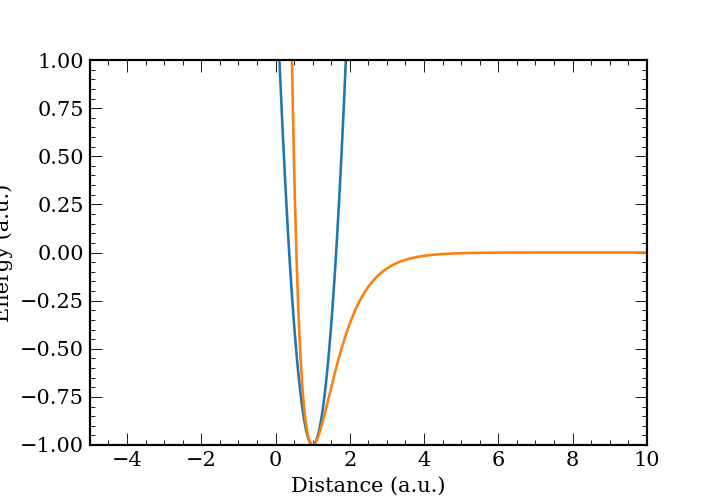

In [32]:
# Set the variables (fix these for now)
D=1.0
k=5
r_e=1.0

# Make a vector for the x axis from -10 to 10 with 2000 step inbetween
x = np.linspace(-10,10,num=2000)

# Write the equation for the harmonic potential here
def U_harm(x,k,D,r_e):
    return ###WRITE EQUATION HERE###

# Write the equation for the morse potential here
def U_morse(x,k,D,r_e):
    a = np.sqrt(k/2/D)
    return ###WRITE EQUATION HERE###

# Plotting the potential
plt.figure()
plt.xlabel("Distance (a.u.)")
plt.ylabel("Energy (a.u.)")
plt.plot(x,U_harm(x,k,D,r_e))
plt.plot(x,U_morse(x,k,D,r_e))
plt.ylim((-1,1))
plt.xlim((-5,10))
plt.show()

**Task 2** - Plot the bottom of the well and talk about when the harmonic approximation is appropriate.

Let's make it interactive! The next cell can be run and will show you how the different parameters in the equation change the graph. 

<IPython.core.display.Javascript object>


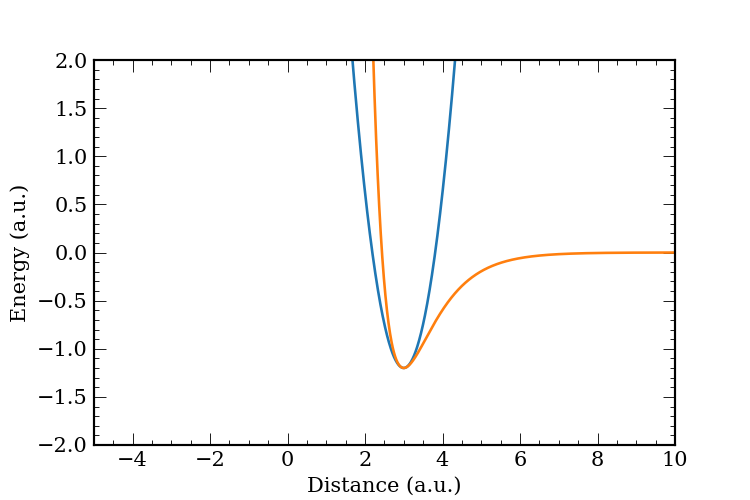

interactive(children=(FloatSlider(value=5.0, description='k', max=10.0, min=0.5, step=0.05), FloatSlider(value…

In [33]:
fig, ax = plt.subplots(figsize=(6,4))

ax.grid(True)

@widgets.interact(k=(0.5,10,0.05), D=(0,2,0.1), r_e=(0,5,0.5))
def update(k=5,D=1,r_e=1):
    # Plotting the potential
    ax.clear()
    #ax.set_ylim([-2,2])
    plt.ylim((-2,2))
    plt.xlim((-5,10))
    plt.xlabel("Distance (a.u.)")
    plt.ylabel("Energy (a.u.)")
    ax.plot(x, U_harm(x,k,D,r_e))
    ax.plot(x, U_morse(x,k,D,r_e))

**Task 3** - Explain what each parameter does to the potential energy surface for the two functions.

## Classical forces

Let's consider a configuration and how it would oscillate within this potential. We need to work out the force given a certain distance. Force can be computed from the gradient/derivative of the potential energy surface

\begin{equation}
F = -\frac{dU}{dx} = -\nabla U
\end{equation}

\begin{equation}
F_{harm} = -\frac{dU}{dx} = -\frac{d}{dx}\left(\frac{1}{2}k(x-r_e)^2-D_e\right) = -k(x-r_e)
\end{equation}

\begin{equation}
F_{morse} = -\frac{d}{dx}\left(D_e\left(1-e^{-a (r-r_e)}\right)^2-D_e\right) = -2aDe^{-2a(x-r_e)}(e^{(a(x-r_e))}-1)
\end{equation}

**Task 4** - Write two more functions force_harm and force_morse and plot the force as well as the energy on the same plot.


In [27]:
def force_harm(x,k,D,r_e):
    return ###WRITE EQUATION HERE###

def force_morse(x,k,D,r_e):
    a = np.sqrt(k/2/D)
    return ###WRITE EQUATION HERE###

<IPython.core.display.Javascript object>


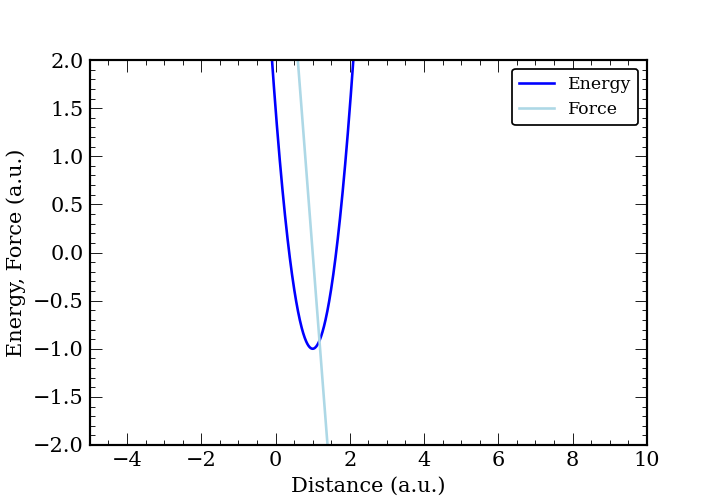

In [28]:
plt.figure()
plt.ylim((-2,2))
plt.xlim((-5,10))
plt.plot(x,U_harm(x,k,D,r_e),label="Energy",color='blue')
plt.plot(x,force_harm(x,k,D,r_e),label="Force",color='lightblue')
plt.xlabel("Distance (a.u.)")
plt.ylabel("Energy, Force (a.u.)")
plt.legend()
plt.show()

<IPython.core.display.Javascript object>


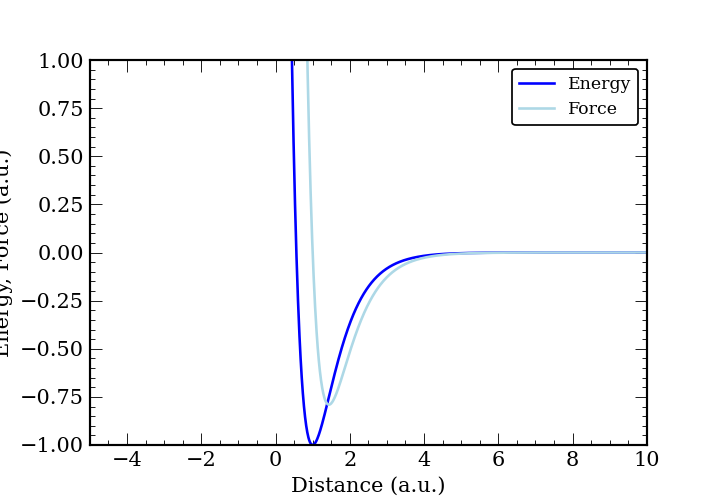

In [10]:
plt.figure()
plt.ylim((-1,1))
plt.xlim((-5,10))
plt.plot(x,U_morse(x,k,D,r_e),label="Energy",color='blue')
plt.plot(x,force_morse(x,k,D,r_e),label="Force",color='lightblue')
plt.xlabel("Distance (a.u.)")
plt.ylabel("Energy, Force (a.u.)")
plt.legend()
plt.show()

**Task 5** - On which side of the morse potential is the force greater?

## Classical molecular dynamics

In order to simulate molecular dynamics of these two systems we need to start the bond length at a given value. 

The equations of motion then describe how the system moves

\begin{eqnarray}
a_i(t,x) &=& \frac{F_i(t,x)}{m_i} \\
v_i(t+\delta t) &=& v_i(t) + a_i(t,x)\delta t \\
x_i(t+\delta t) &=& x_i(t) + v_i(t)\delta t + \frac{1}{2}a_i(t,x)\delta t^2 \\
\end{eqnarray}

where $a_i$, $v_i$ and $x_i$ are the acceleration, velocity and position of particle $i$, and $\delta t$ is called the time step.

**Task 6** - Plot the position of the particle as it oscillates over time in the harmonic well.

<IPython.core.display.Javascript object>


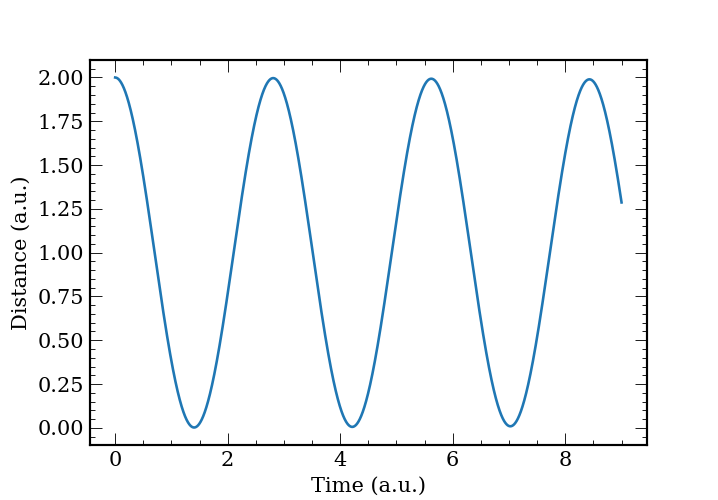

In [11]:
#Simulation setup
dt = 0.001 # Time step
t_ = 0     # Starting time
x_ = 2.0   # Starting position
v_ = 0     # Starting velocity
m_ = 1     # Reduced mass
t_max=9    # Time to end simulation

lst_x = [] # Lists to put the position, energy and time values
lst_y = []
lst_t = []

while t_ < t_max:                  # Keep going until max time is reached
    t_ = t_ + dt                   # Move the time forward by delta t
    a_ = force_harm(x_,k,D,r_e)/m_ # Compute the acceleration
    v_ = v_ + a_*dt                # Change the velocity
    x_ = x_ + v_*dt + 0.5*a_*dt*dt # Change the position based on the new velocity and acceleration
    y_ = U_harm(x_,k,D,r_e)        # Determine the energy for the new position
    
    lst_x.append(x_)               # Add new values to the lists
    lst_y.append(y_)
    lst_t.append(t_)
    
plt.figure()
plt.plot(lst_t,lst_x)
plt.xlabel('Time (a.u.)')
plt.ylabel('Distance (a.u.)')
plt.show()

**Task 7** - Determine the dynamics of a molecule in the morse potential and compare them with the harmonic potential.

In [ ]:
#Simulation setup
dt = 0.001 # Time step
t_ = 0     # Starting time
x_ = 2.0   # Starting position
v_ = 0     # Starting velocity
m_ = 1     # Reduced mass
t_max=9    # Time to end simulation

lst_x = [] # Lists to put the position, energy and time values
lst_y = []
lst_t = []

while t_ < t_max:                  # Keep going until max time is reached
    t_ = t_ + dt                   # Move the time forward by delta t
    a_ = force_morse(x_,k,D,r_e)/m_ # Compute the accerlation
    v_ = v_ + a_*dt                # Change the velocity
    x_ = x_ + v_*dt + 0.5*a_*dt*dt # Change the position based on the new velocity and acceleration
    y_ = U_morse(x_,k,D,r_e) # Determine the energy for the new position
    
    lst_x.append(x_)               # Add new values to the lists
    lst_y.append(y_)
    lst_t.append(t_)
    
plt.figure()
plt.plot(lst_t,lst_x)
plt.xlabel('Time (a.u.)')
plt.ylabel('Distance (a.u.)')
plt.show()

**Task 8** - Change the maximum simulation time to `t_max=100`, a small displacement `x_=1.1`, and `m_=1200` compare the period of the oscillation, $T$, with the value determined from the spring constant. Discuss how accurately does the harmonic approximation works for the morse potential near equilbrium.

\begin{eqnarray}
\omega_0 = \sqrt{\frac{k}{m}} \\
f = \frac{\omega_0}{2\pi} \\
T = 1/f \\
\end{eqnarray} 

In [1]:
## Calculate value here

**Task 9** - Set up another simulation with a larger initial displacement Change the maximum simulation time `t_max=100`, a larger initial displacement `x_=2.0`, and `m_=1200` change the t_max to be a period.

<IPython.core.display.Javascript object>


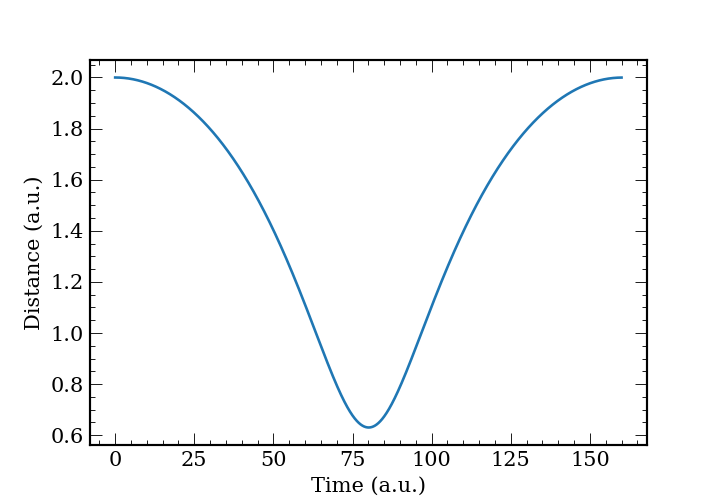

In [13]:
#Simulation setup
dt = 0.001 # Time step
t_ = 0     # Starting time
x_ = 2.0   # Starting position
v_ = 0     # Starting velocity
m_ = #CHANGE#     # Reduced mass
t_max=160    # Time to end simulation

lst_x = [] # Lists to put the position, energy and time values
lst_y = []
lst_t = []

while t_ < t_max:                  # Keep going until max time is reached
    t_ = t_ + dt                   # Move the time forward by delta t
    a_ = force_morse(x_,k,D,r_e)/m_ # Compute the accerlation
    v_ = v_ + a_*dt                # Change the velocity
    x_ = x_ + v_*dt + 0.5*a_*dt*dt # Change the position based on the new velocity and acceleration
    y_ = U_morse(x_,k,D,r_e)        # Determine the energy for the new position
    
    lst_x.append(x_)               # Add new values to the lists
    lst_y.append(y_)
    lst_t.append(t_)
    
plt.figure()
plt.plot(lst_t,lst_x)
plt.xlabel('Time (a.u.)')
plt.ylabel('Distance (a.u.)')
plt.show()

Let's animate the vibration in the morse potential.

<IPython.core.display.Javascript object>


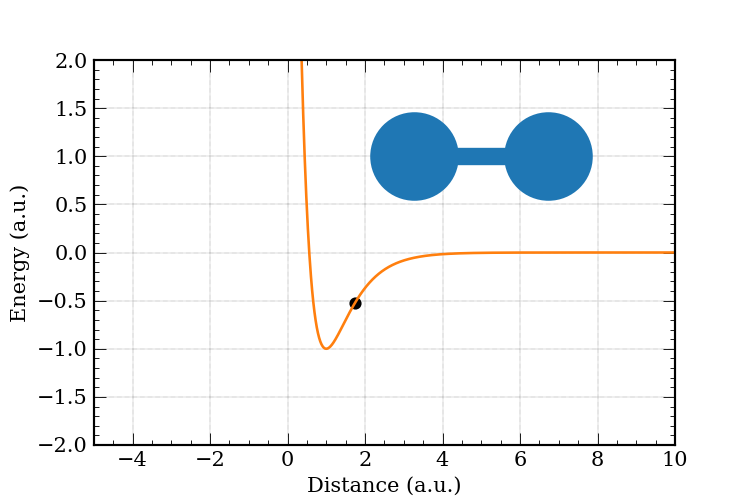

In [34]:
fig, ax = plt.subplots(figsize=(6,4))

ax.grid(True)

t_sim = np.round(lst_t,decimals=4)

index = 0
plt.ylim((-2,2))
plt.xlim((-5,10))
plt.xlabel("Distance (a.u.)")
plt.ylabel("Energy (a.u.)")
ax.plot([5-lst_x[index],5+lst_x[index]],[1,1],marker='o',markersize=50,linewidth=10)
ax.plot(lst_x[index], lst_y[index],'ko')
ax.plot(x,U_morse(x,k,D,r_e))

#@widgets.interact(t=(0.001,10,0.001))
def update(change):
    # Plotting the potential
    ax.clear()
    ax.grid(True)
    #ax.set_ylim([-2,2])
    index = np.where(t_sim==slider.value)[0][0]
    plt.ylim((-2,2))
    plt.xlim((-5,10))
    plt.xlabel("Distance (a.u.)")
    plt.ylabel("Energy (a.u.)")
    #circle = plt.Circle((5-lst_x[index],1),0.2)
    #circle2 = plt.Circle((5+lst_x[index],1),0.2)
    #ax.add_artist(circle)
    #ax.add_artist(circle2)
    ax.plot([5-lst_x[index],5+lst_x[index]],[1,1],marker='o',markersize=50,linewidth=10)
    ax.plot(lst_x[index], lst_y[index],'ko')
    ax.plot(x,U_morse(x,k,D,r_e))
    
play = widgets.Play(
    value=1,
    min=1,
    max=int(t_max),
    step=5,
    interval=200,
    description="Press play",
    loop=True,
    play=True,
    disabled=False
)

slider = widgets.IntSlider(value=1,min=1,max=int(t_max))
widgets.jslink((play, 'value'), (slider, 'value'))

play.observe(update)
widgets.HBox([play, slider])

## Molecular dynamics simulatons of water